# Iris Flower Classification using Decision Tree

In this Machine Learning project, We train a Decision tree model to classify different species of Iris Flower i.e. Setosa, Virginica, Versicolor. Building a Decision Tree model is simple. I also have added Visualization of the Decision Tree in both Text and Image representation.

In [94]:
#importing necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

#changing directory to import downloaded dataset
#or we could import iris dataset from sklearn too
import os
os.chdir("/Users/prashant/Downloads")

In [95]:
#reading iris dataset
iris = pd.read_csv("IRIS.csv", delimiter=",")
iris[0:5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [96]:
#assigning features array X
X = iris[["sepal_length", "sepal_width", "petal_length", "petal_width"]].values
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [97]:
#assigning target array y
y = iris["species"].values
y[0:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

# Spliting data into Test-Train dataset

In [98]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
X_trainset.shape, X_testset.shape, y_trainset.shape, y_testset.shape

((105, 4), (45, 4), (105,), (45,))

# Modelling and Fitting the Decision Tree Classifier

In [99]:
iris_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4,random_state=1234)
iris_tree

#fiting the model
iris_tree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1234)

# Text representation of Decision Tree

In [100]:
text_representation = tree.export_text(iris_tree)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: Iris-setosa
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_0 <= 6.15
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_0 >  6.15
|   |   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica



# Visual Representaion of Tree

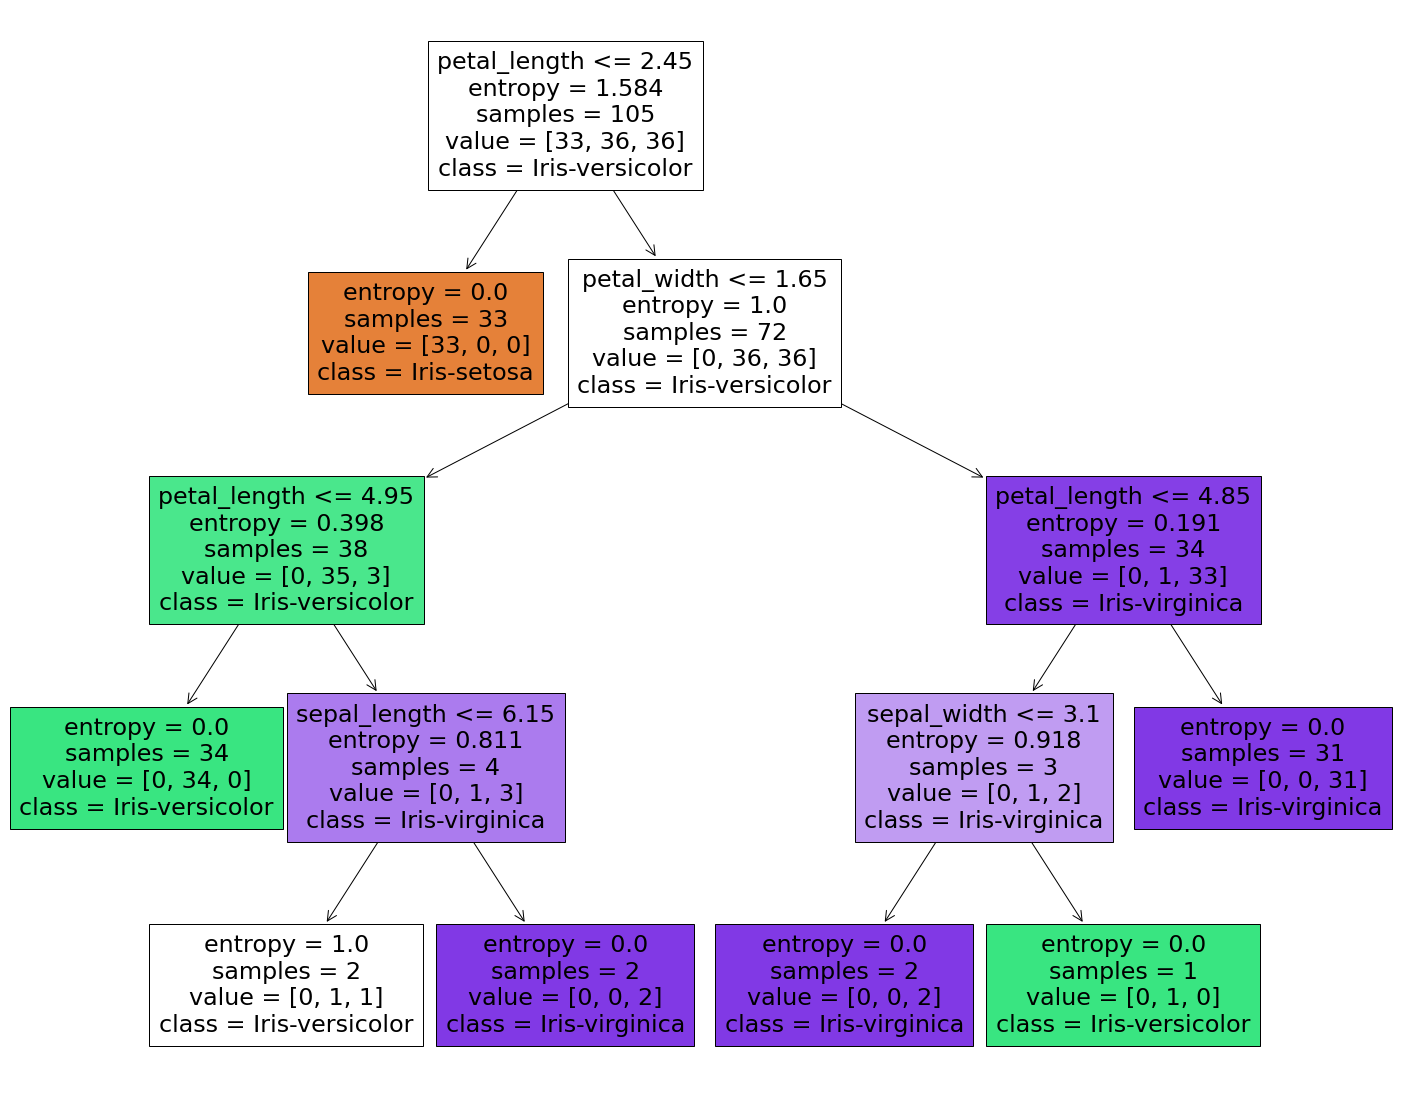

In [101]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(iris_tree, 
                   feature_names=iris.columns[0:4].tolist(),  
                   class_names=iris["species"].unique().tolist(),
                   filled=True)

#saving it into a .png file
fig.savefig("decistion_tree.png")

# Prediction

In [102]:
predtree = iris_tree.predict(X_testset)

In [103]:
print(predtree[15:25])
print(y_testset[15:25])

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa']
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa']


# Accuracy Evaluation

In [104]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", round(metrics.accuracy_score(y_testset, predtree),2))

DecisionTrees's Accuracy:  0.96
